In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('data/cc_data.csv')

d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Columns:",list(df.columns.values))
print("Shape:",df.shape)

Columns: ['Transaction ID', 'Account Identifier', 'Account Name', 'Account Number', 'Account Type', 'Bank Name', 'Aggregator Name', 'Consumer ID', 'Consumer Gender', 'Consumer Postal Code', 'Consumer City Name', 'Ethnicity', 'Consumer Birth Year', 'Consumer Created Date', 'Transaction Type', 'Transaction String', 'Normalized Retailer', 'SIC Code', 'SIC Description', 'Purchase Amount', 'Return Amount', 'Reward Amount', 'Transaction Date', 'Posted Date', 'Data Creation Date']
Shape: (3000000, 25)


In [4]:
# remove unnecessary columns
#col2remove = ['Transaction ID','Account Identifier','Account Number','Consumer ID','Posted Date']
#df.drop(col2remove, axis = 1, inplace = True)

In [5]:
print("Columns with numbers: ", list(df.select_dtypes(include=[np.number]).columns.values))
print("Columns with text: ", list(df.select_dtypes(exclude=[np.number]).columns.values))

Columns with numbers:  ['Consumer Birth Year', 'SIC Code', 'Purchase Amount', 'Return Amount', 'Reward Amount']
Columns with text:  ['Transaction ID', 'Account Identifier', 'Account Name', 'Account Number', 'Account Type', 'Bank Name', 'Aggregator Name', 'Consumer ID', 'Consumer Gender', 'Consumer Postal Code', 'Consumer City Name', 'Ethnicity', 'Consumer Created Date', 'Transaction Type', 'Transaction String', 'Normalized Retailer', 'SIC Description', 'Transaction Date', 'Posted Date', 'Data Creation Date']


In [6]:
# Deal with missing values `N/A` in Transaction Date
df['Transaction Date'].replace({"N\A":None}, inplace=True)

# check missing values
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['variable', 'missing counts']
missing_df['missing per (%)'] = (missing_df['missing counts'])/df.shape[0]*100
missing_df.sort_values('missing per (%)',ascending = False).reset_index(drop = True)

,variable,missing counts,missing per (%)
0,Ethnicity,66425,2.214167
1,Transaction Date,2853,0.095100
2,Account Number,52,0.001733
3,Transaction ID,0,0.000000
4,Transaction Type,0,0.000000
5,Posted Date,0,0.000000
6,Reward Amount,0,0.000000
7,Return Amount,0,0.000000
8,Purchase Amount,0,0.000000
9,SIC Description,0,0.000000


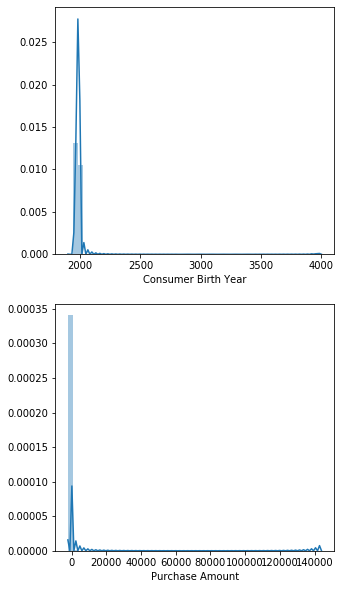

In [7]:
# check columns with number
num_list = ['Consumer Birth Year','Purchase Amount']

f, axes = plt.subplots(len(num_list), 1, figsize=(5, 5*len(num_list)));
for i, column_name in enumerate(num_list):
    sns.distplot(df[column_name],ax=axes[i])

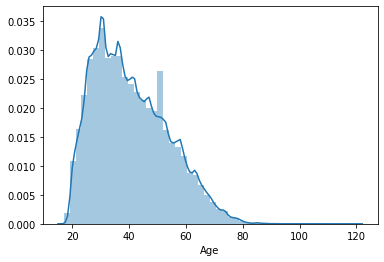

In [8]:
# calculate consumer age, any birth year after 2020 is converted to null
df['Age'] = df['Consumer Birth Year'].apply(lambda x: 2020 - int(x) if int(x) < 2020 else None)
sns.distplot(df['Age']);

In [9]:
text_col_list = ['Account Type', 'Bank Name', 'Aggregator Name','Consumer Gender','Consumer City Name',
                 'Ethnicity', 'Transaction Type','Normalized Retailer', 'SIC Description']
#text_col_list = ['Bank Name']
def view_column_counts(df,col_name):
    df_pivot = df.groupby(by = col_name, as_index=False).agg({'Transaction ID': pd.Series.nunique})
    df_pivot.columns = [col_name, 'Counts']
    df_pivot['Per (%)'] = (df_pivot['Counts'])/df.shape[0]*100
    df_pivot.sort_values(by = 'Counts',ascending = False,inplace = True)
    return df_pivot

for col_name in text_col_list:   
    print(col_name)
    print(view_column_counts(df,col_name))
    print('\n')
    


Account Type
         Account Type   Counts    Per (%)
0        bank_account  1634711  54.490367
1         credit_card  1361434  45.381133
2  investment_account      404   0.013467


Bank Name
           Bank Name   Counts    Per (%)
4               cibc  2553648  85.121600
12               rbc   116064   3.868800
16                td    67582   2.252733
13            scotia    67492   2.249733
0   american_express    46718   1.557267
1                bmo    45305   1.510167
14           simplii    41166   1.372200
15         tangerine    39616   1.320533
6         desjardins     7907   0.263567
2      canadian_tire     6011   0.200367
10          meridian     2089   0.069633
11               nbc      969   0.032300
17           vancity      530   0.017667
7               hsbc      467   0.015567
8       laurentienne      432   0.014400
5      coast_capital      280   0.009333
3        capital_one      125   0.004167
9               mbna       83   0.002767
18           walmart       6

Interesting findings here:
 - Account Type: good balance between bank_account and credit_card
 - Bank Name: large proportion (~85%) on cibc
 - Aggregator Name: large proportion (~85%) on cibc
 - Consumer Gender: 55% female and 44% male
 - Ethnicity: 78% white and 13% asian and rest
 - Normalized Retailer: Top 5 are Tim Hortons, McDonald's, Walmart, Amazon and Shoppers Drug Mart
 - SIC (Standard Industrial Classification): Eating Places, Grocery Stores, Gasoline, Book Stores and Drug Stores contains up to ~70%

In [10]:
# Total purchase amount and transaction counts over time
df_TS = df.groupby("Transaction Date").agg({'Purchase Amount': 'sum','Transaction ID':'count'}).rename(columns={'Purchase Amount':'Purchase Sum','Transaction ID':'Transaction Count'})
print(df_TS)

                  Purchase Sum  Transaction Count
Transaction Date                                 
2018-01-06               50.00                  1
2018-01-13               50.00                  1
2018-01-20               50.00                  1
2018-01-30               50.00                  1
2018-02-03               50.00                  1
...                        ...                ...
2020-01-07               18.91                  2
2020-01-09                9.02                  1
2020-01-10               18.56                  2
2020-01-13               30.12                  2
2020-01-14                2.29                  1

[514 rows x 2 columns]


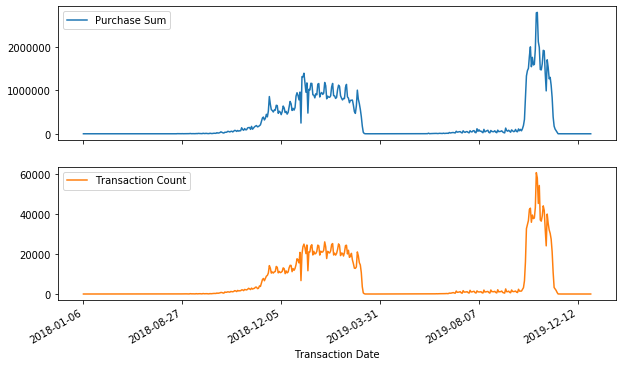

In [11]:
df_TS.plot(subplots = True, y= ["Purchase Sum","Transaction Count"], figsize=(10,6));

Most of the transactions are within the two periods:
 - Dec 2018 - Feb 2019
 - Oct 2019
This doesn't look like real variations but more like data bias, i.e. more data are collected during the two periods.

In [12]:
# only keep data from Dec 2018 to Feb 2019 for top 5 sectors, and check their temporal variations
df['Date'] = pd.to_datetime(df['Transaction Date'])  
df = df[(df['Date'] > '2018-12-01') & (df['Date'] <= '2019-02-28')]

top5list = ["Eating Places","Grocery Stores","Gasoline Service Stations","Book Store","Drug Stores and Proprietary Stores"]
df = df[df['SIC Description'].str.contains('|'.join(top5list))]

In [13]:
df_TS_sector = df.groupby(["Date","SIC Description"]).agg({'Purchase Amount': 'sum'})
df_TS_sector.head(20)

Purchase Amount
Date       SIC Description                                    
2018-12-02 Book Stores                                26822.16
           Drug Stores and Proprietary Stores         16922.72
           Eating Places                              57779.69
           Gasoline Service Stations                  36766.66
           Grocery Stores                            158306.89
2018-12-03 Book Stores                                35584.31
           Drug Stores and Proprietary Stores         19795.41
           Eating Places                              73263.59
           Gasoline Service Stations                  37998.64
           Grocery Stores                            138339.96
2018-12-04 Book Stores                                37525.90
           Drug Stores and Proprietary Stores         17534.69
           Eating Places                              67545.75
           Gasoline Service Stations                  36381.69
           Grocery Stores                            124631.14
2018-12-05 Book Stores                                30325.98
           Drug Stores and Proprietary Stores         17009.10
           Eating Places                              62631.45
           Gasoline Service Stations                  35836.17
           Grocery Stores                             95689.67

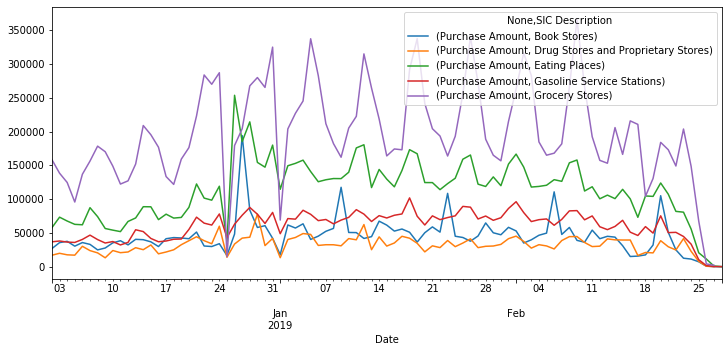

In [20]:
df_TS_sector.unstack(level=1).plot(subplots = False, y= ["Purchase Amount"], figsize=(12,5));

Interesting findings:
 - Grocery Stores and Eating Places have weekly variations.
 - Book Stores has peak values roughly every 2 weeks.
 - Gasline and Drug Stores contributation are relatively stable.
 
Ideas:
 - checking amount on each day of the week (Mon, Tue...) may shed new insights?
 - Is this variation reflecting the actual consumptions or there could be bias in the data? If so, how do we distinguish the bias?